In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import math
import matplotlib.pyplot as plt

In [2]:
A_train = pd.read_csv("classificationA.train", sep  = "\t", names=["X1","X2","Y"])
B_train = pd.read_csv("classificationB.train", sep  = "\t", names=["X1","X2","Y"])
C_train = pd.read_csv("classificationC.train", sep  = "\t", names=["X1","X2","Y"])

A_test = pd.read_csv("classificationA.test", sep  = "\t", names=["X1","X2","Y"])
B_test = pd.read_csv("classificationB.test", sep  = "\t", names=["X1","X2","Y"])
C_test = pd.read_csv("classificationC.test", sep  = "\t", names=["X1","X2","Y"])

### Calcul des EMV

In [3]:
N_A = A_train.Y.sum()
n_A = A_train.Y.size

N_B = B_train.Y.sum()
n_B = B_train.Y.size

N_C = C_train.Y.sum()
n_C = C_train.Y.size

Estimateur de $\pi$

In [27]:
Pi_A = N_A/n_A
Pi_B = N_B/n_B
Pi_C = N_C/n_C
Pi_C

0.625

Estimateur de $\mu_0$ et $\mu_1$

In [5]:
mu0_A = A_train[['X1','X2']].mul(1-A_train.Y, axis=0).sum()/(n_A-N_A)
mu1_A = A_train[['X1','X2']].mul(A_train.Y, axis=0).sum()/N_A

mu0_B = B_train[['X1','X2']].mul(1-B_train.Y, axis=0).sum()/(n_B-N_B)
mu1_B = B_train[['X1','X2']].mul(B_train.Y, axis=0).sum()/N_B

mu0_C = C_train[['X1','X2']].mul(1-C_train.Y, axis=0).sum()/(n_C-N_C)
mu1_C = C_train[['X1','X2']].mul(C_train.Y, axis=0).sum()/N_C

In [6]:
print(mu0_A)
print(mu1_A)

X1    2.899709
X2   -0.893874
dtype: float64
X1   -2.692320
X2    0.866042
dtype: float64


In [7]:
print(mu0_B)
print(mu1_B)

X1    3.340689
X2   -0.835463
dtype: float64
X1   -3.216707
X2    1.083067
dtype: float64


In [8]:
print(mu0_C)
print(mu1_C)

X1    2.793048
X2   -0.838387
dtype: float64
X1   -2.942329
X2   -0.957828
dtype: float64


Estimateur de $\Sigma$

In [9]:
Centered_A_train = (A_train[['X1','X2']]-mu1_A).mul(A_train.Y, axis=0) + (A_train[['X1','X2']]-mu0_A).mul(1-A_train.Y, axis=0)
Centered_B_train = (B_train[['X1','X2']]-mu1_B).mul(B_train.Y, axis=0) + (B_train[['X1','X2']]-mu0_B).mul(1-B_train.Y, axis=0)
Centered_C_train = (C_train[['X1','X2']]-mu1_C).mul(C_train.Y, axis=0) + (C_train[['X1','X2']]-mu0_C).mul(1-C_train.Y, axis=0)

In [10]:
Sigma_A = Centered_A_train.T.dot(Centered_A_train)/n_A
Sigma_B = Centered_B_train.T.dot(Centered_B_train)/n_B
Sigma_C = Centered_C_train.T.dot(Centered_C_train)/n_C

print(Sigma_A)
print(Sigma_B)
print(Sigma_C)

          X1        X2
X1  2.441909 -1.131940
X2 -1.131940  0.613755
          X1        X2
X1  3.346235 -0.135165
X2 -0.135165  1.738075
          X1        X2
X1  2.880392 -0.634051
X2 -0.634051  5.199524


### Visualisation

Visualisation de $\mu_0$ et $\mu_1$

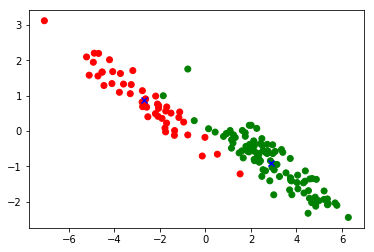

In [11]:
color = ['red' if l else 'green' for l in A_train.Y]
plt.scatter(A_train.X1, A_train.X2, color=color)
plt.scatter(mu0_A.X1, mu0_A.X2, color="blue", marker="x")
plt.scatter(mu1_A.X1, mu1_A.X2, color="blue", marker="x")
plt.show()

Visualisation de $\Sigma$

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma_A)
EV = pd.DataFrame(eigenvectors,index=['X1','X2'])

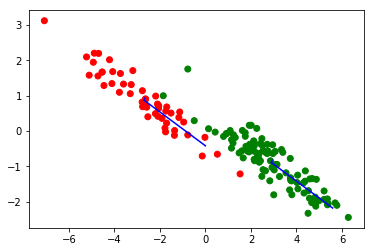

In [13]:
plt.scatter(A_train.X1, A_train.X2, color=color)
SAxis_x1, SAxis_y1 = [mu1_A.X1, (mu1_A+Sigma_A.dot(EV[0])).X1], [mu1_A.X2, (mu1_A+Sigma_A.dot(EV[0])).X2]
SAxis_x2, SAxis_y2 = [mu1_A.X1, (mu1_A+Sigma_A.dot(EV[1])).X1], [mu1_A.X2, (mu1_A+Sigma_A.dot(EV[1])).X2]
SAxis_x3, SAxis_y3 = [mu0_A.X1, (mu0_A+Sigma_A.dot(EV[0])).X1], [mu0_A.X2, (mu0_A+Sigma_A.dot(EV[0])).X2]
SAxis_x4, SAxis_y4 = [mu0_A.X1, (mu0_A+Sigma_A.dot(EV[1])).X1], [mu0_A.X2, (mu0_A+Sigma_A.dot(EV[1])).X2]
plt.plot(SAxis_x1, SAxis_y1, SAxis_x2, SAxis_y2, SAxis_x3, SAxis_y3, SAxis_x4, SAxis_y4, color="blue")
plt.show()

### Visualisation de la frontière

$p(y=1 | x)=\sigma(w^T x + b)$ where $w = \Sigma^{-1} (\mu_1 - \mu_0)$ and $b = \frac{1}{2} \mu_0^T \Sigma^{-1} \mu_0  - \frac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 - \log\left(\frac{\Pi}{1-\Pi}\right)$

On a $\sigma(w^T x + b) = \sigma(w_1 x_1 + w_2 x_2  + b) = \frac{1}{2} \Leftrightarrow w_1 x_1 + w_2 x_2 + b = 0 \Leftrightarrow x_2 = \frac{1}{w_2} (- b - w_1 x_1)$

In [14]:
w_A = pd.Series(np.linalg.inv(Sigma_A).dot(mu1_A-mu0_A),index=["X1","X2"])
b_A = 0.5*mu0_A.T.dot(np.linalg.inv(Sigma_A)).dot(mu0_A) - 0.5*mu1_A.T.dot(np.linalg.inv(Sigma_A)).dot(mu1_A) - np.log(Pi_A/(1-Pi_A))

w_B = pd.Series(np.linalg.inv(Sigma_B).dot(mu1_B-mu0_B),index=["X1","X2"])
b_B = 0.5*mu0_B.T.dot(np.linalg.inv(Sigma_B)).dot(mu0_B) - 0.5*mu1_B.T.dot(np.linalg.inv(Sigma_B)).dot(mu1_B) - np.log(Pi_B/(1-Pi_B))

w_C = pd.Series(np.linalg.inv(Sigma_C).dot(mu1_C-mu0_C),index=["X1","X2"])
b_C = 0.5*mu0_C.T.dot(np.linalg.inv(Sigma_C)).dot(mu0_C) - 0.5*mu1_A.T.dot(np.linalg.inv(Sigma_C)).dot(mu1_C) - np.log(Pi_C/(1-Pi_C))

In [15]:
def visualize(data, weights, const):
    color = ['red' if l else 'green' for l in data.Y]
    plt.scatter(data.X1, data.X2, color=color)
    axes = plt.gca()
    axes.set_xlim([data.X1.min()-1,data.X1.max()+1])
    axes.set_ylim([data.X2.min()-1,data.X2.max()+1])
    
    x = np.linspace(data.X1.min(),data.X1.max(),1000)
    def f(t):
        return (1/weights.X2)*(- const - weights.X1*t)
    plt.plot(x,f(x))
    plt.show()

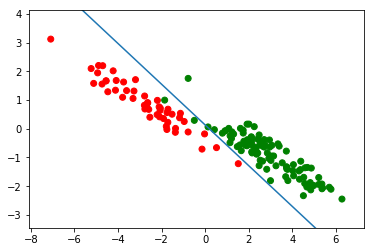

In [16]:
visualize(A_train, w_A, b_A)

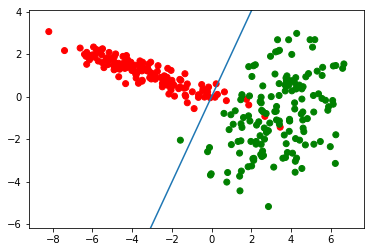

In [17]:
visualize(B_train, w_B, b_B)

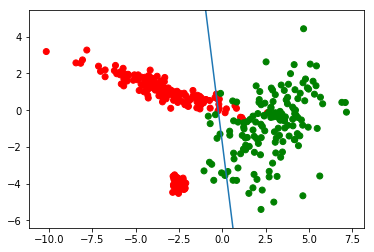

In [18]:
visualize(C_train, w_C, b_C)

### Erreur

Train

In [19]:
((A_train[["X1","X2"]].dot(w_A) + b_A > 0) != A_train.Y).mean()

0.013333333333333334

In [20]:
((B_train[["X1","X2"]].dot(w_B) + b_B > 0) != B_train.Y).mean()

0.029999999999999999

In [21]:
((C_train[["X1","X2"]].dot(w_C) + b_C > 0) != C_train.Y).mean()

0.0625

Test

In [22]:
((A_test[["X1","X2"]].dot(w_A) + b_A > 0) != A_test.Y).mean()

0.032000000000000001

In [23]:
((B_test[["X1","X2"]].dot(w_B) + b_B > 0) != B_test.Y).mean()

0.041500000000000002

In [24]:
((C_test[["X1","X2"]].dot(w_C) + b_C > 0) != C_test.Y).mean()

0.042333333333333334